# 2 - Discover Phase

In [1]:
# Author information
__author__ = "Troy Reynolds"
__email__ = "Troy.Lloyd.Reynolds@gmail.com"

In [2]:
## Libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Add data_storage and helper_functions to directory
sys.path.insert(0, "./data_storage")
sys.path.insert(0, "./helper_functions")

# helper functions
from reporting import dtype_selector
from file_management import data_import
from visualization import feature_visualizer, positive_class_percentages, heatmap, cat_num_pivot_tables

### Load Data:

In [3]:
# Load data
data = data_import("train")

# remove ids
data_no_id = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# convert to categorical features
col_convert_list = ["NumOfProducts", "HasChckng", "IsActiveMember", "Exited"]
data_viz = data_no_id.copy()
data_viz[col_convert_list] = data_viz[col_convert_list].astype("object")

# data info
data_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2151 to 6206
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7997 non-null   float64
 1   Geography        8000 non-null   object 
 2   Gender           8000 non-null   object 
 3   Age              8000 non-null   int64  
 4   Tenure           8000 non-null   int64  
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   object 
 7   HasChckng        8000 non-null   object 
 8   IsActiveMember   8000 non-null   object 
 9   EstimatedSalary  8000 non-null   float64
 10  Exited           8000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 750.0+ KB


# Tabular View of Distribution

#### <u>Numerical Features:</u>
1. **CreditScore**: The mininum value is below 350, but is still within the FICO range.
2. **Balance**: More than 25% of clients have a balance of 0.
3. **EstimatedSalary**: The minimum Salary is 11.58. This value is most likely from a recent graduate.
4. **Exited**: 20% of the sampled clients have churned suggesting unbalanced data.
5. 

Note: Numerical features includes binary features

In [4]:
data_viz.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,7997.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,650.667125,38.973750,5.019875,76381.207499,99730.811581
std,96.650453,10.683402,2.910204,62302.053597,57335.116540
min,305.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,50691.817500
50%,652.000000,37.000000,5.000000,97055.145000,99446.940000
75%,717.000000,44.000000,8.000000,127633.195000,148527.730000
max,850.000000,190.000000,30.000000,238387.560000,199992.480000


#### <u>Categorical Features:</u>
1. There are 3 levels in Gender
2. Majority of the clients come from the West

In [5]:
data_viz.describe(include = "O")

,Geography,Gender,NumOfProducts,HasChckng,IsActiveMember,Exited
count,8000,8000,8000,8000,8000,8000
unique,3,3,4,2,2,2
top,West,Male,1,1,1,0
freq,3993,4383,4071,5670,4119,6370


# Plotting Distribution

#### <u>Target:</u>
1. The barplot confirms that the data is unbalanced

Saving figure target_eda_plot_Exited


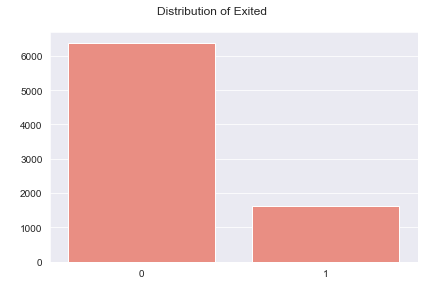

In [6]:
feature_visualizer(data_viz, "target", "Exited")

#### <u>Categorical Features:</u>
1. **Geography**: 
    * Most of the clients reside in the West. 
    * According the bar plot, the clients in the East are more likely to churn.
2. **Gender**:
    * There is a small number of clients with a Neutral gender
    * Females are more likely to churn
3. **NumOfProducts**:
    * Clients with 3 or 4 products have a higher likelihood of churning
    * THe number of clients with 4 products are low, but all churned.
    * Clients with 2 products are least likeliy to churn
2. **IsActiveMember**:
    * Active clients are less likely to churn

Saving figure cat_eda_plot_Geography


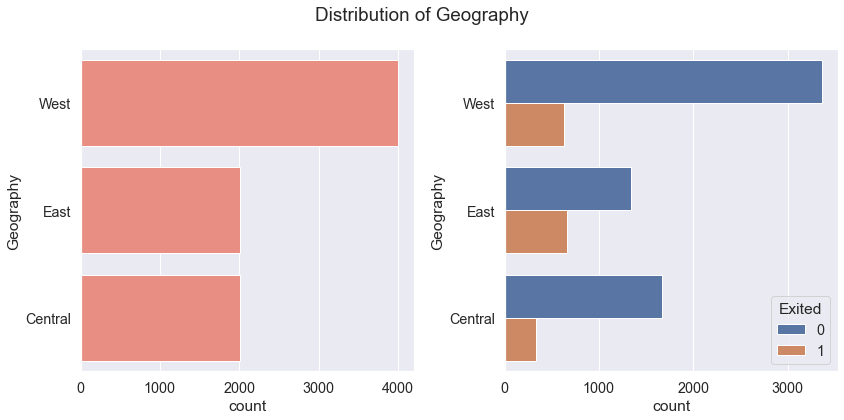

Saving figure cat_eda_plot_Gender


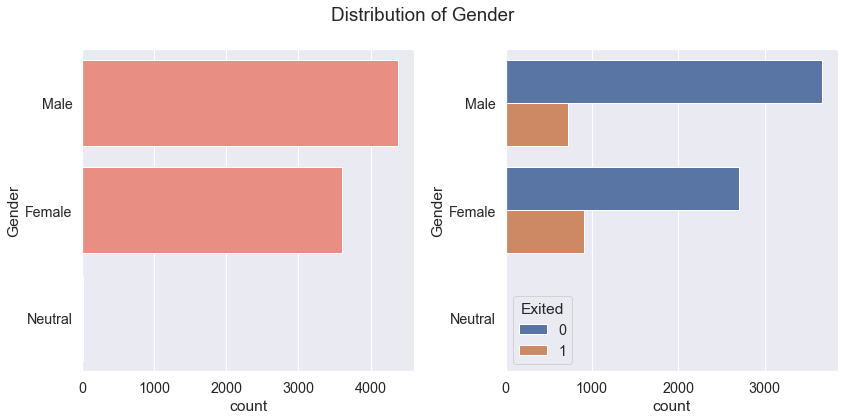

Saving figure cat_eda_plot_NumOfProducts


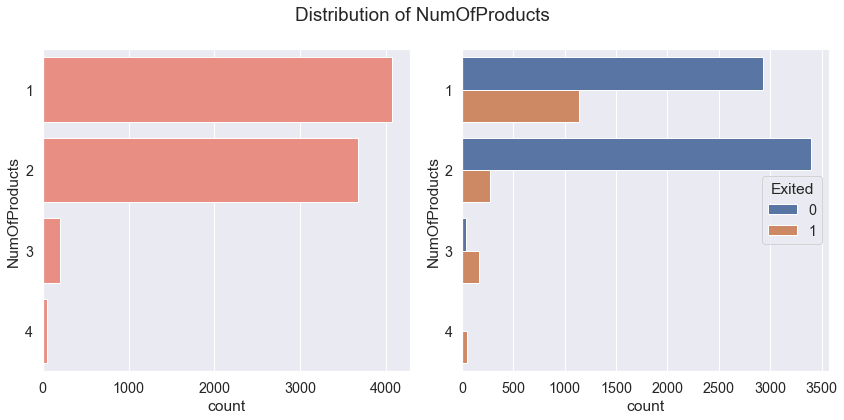

Saving figure cat_eda_plot_HasChckng


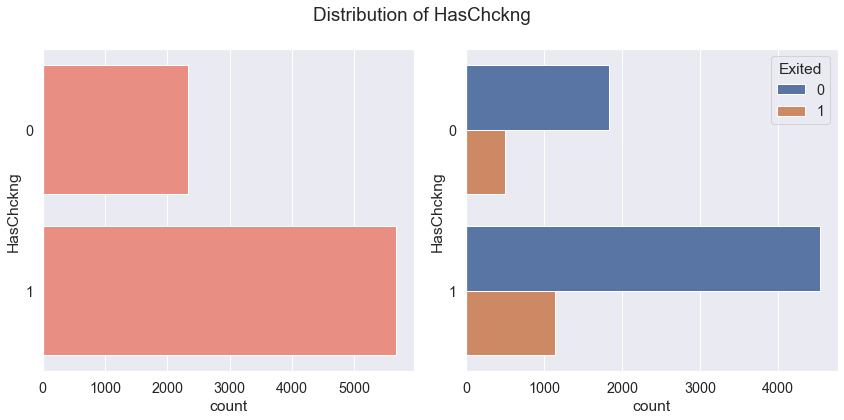

Saving figure cat_eda_plot_IsActiveMember


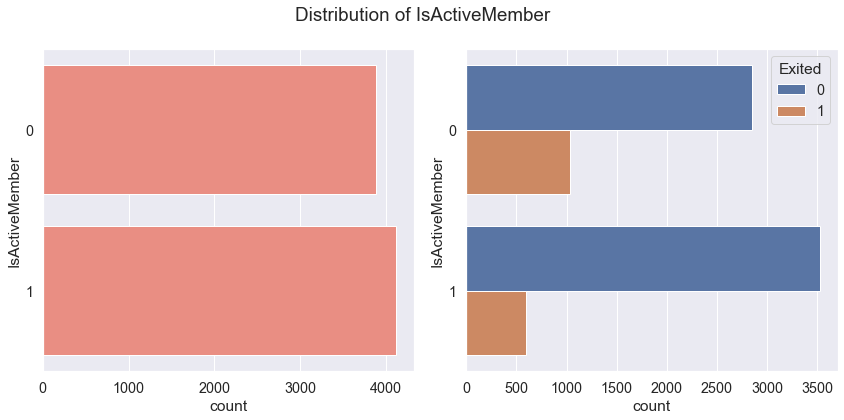

In [7]:
feature_visualizer(data_viz, "cat", "Exited")

#### <u>Numerical Features:</u>
1. **CreditScore**: 
    * There seems to be a cutoff for Credit at 850
    * Without the cutoff, the distribution seems normal
    * According to the boxplot, churned clients have a slightly lower Credit Score
2. **Age**:
    * There is a max value of 190 which suggests that there is an input error
    * Without the outlier, the distribution seems slightly right-tailed
    * According to the boxplot, older clients are more likely to churn
    * ACTION: create a cutoff at 100 for age
3. **Tenure**:
    * There is a max value of 30 which suggests an input error
    * According to the boxplot, Tenure seems to not affect client churning
4. **Balance**:
    * There are many clients with a balance of zero
    * According to the boxplot, clients with a larger balance are more likely to churn
5. **EstimatedSalary**:
    * According to the boxplot, clients with a larger salary are more likely to churn

Saving figure num_eda_plot_CreditScore


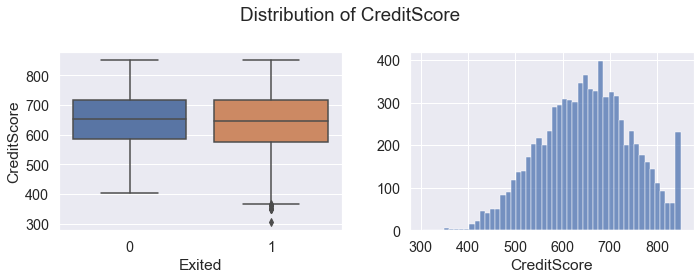

Saving figure num_eda_plot_Age


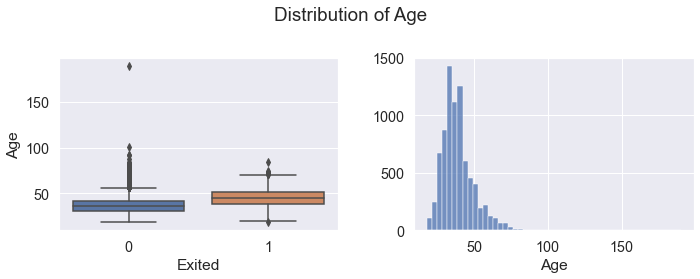

Saving figure num_eda_plot_Tenure


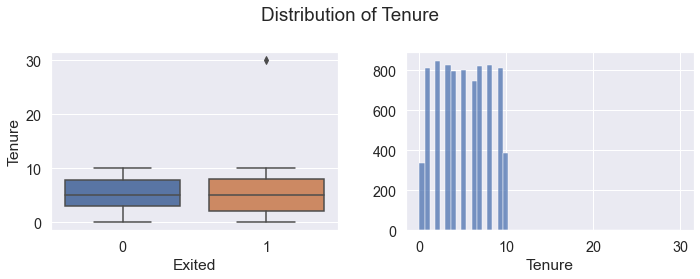

Saving figure num_eda_plot_Balance


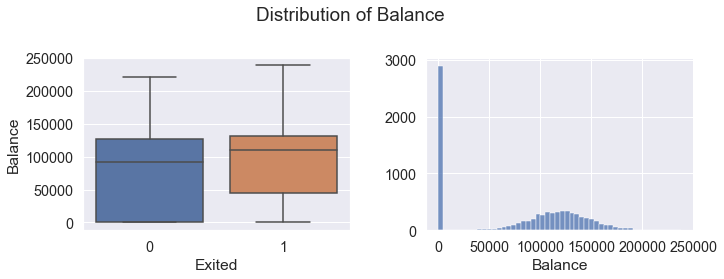

Saving figure num_eda_plot_EstimatedSalary


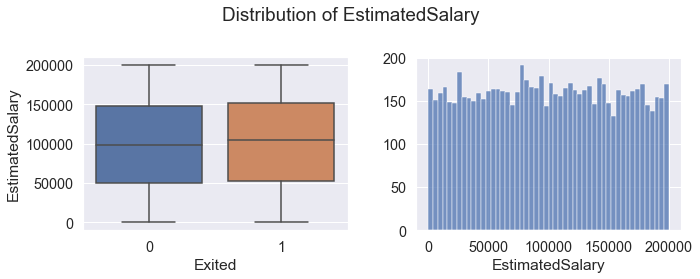

In [8]:
feature_visualizer(data_viz, "num", "Exited")

# Interactions

#### <u>Heat Map for Numeric features:</u>
According to the heat map of numerical features, there does not seem to be any interactions.

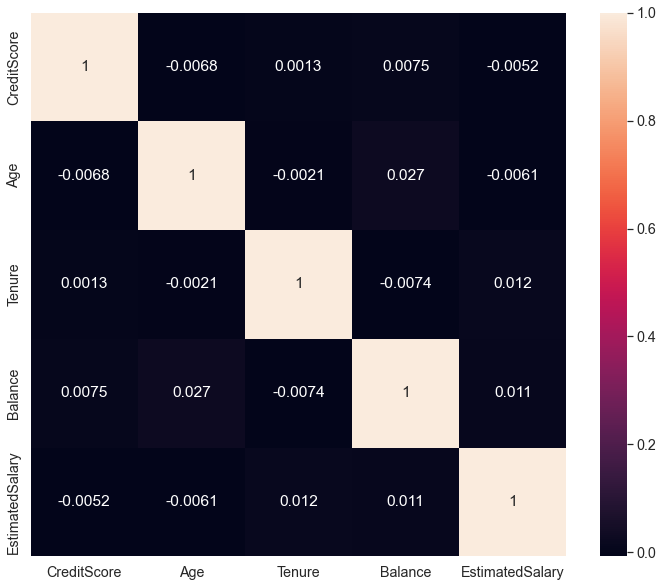

In [9]:
# heat map
heatmap(data_viz)

#### <u>Pivot Table for Percentage of Churned Clients:</u>
According to the pivot tables below, there does not seem to be any interactions amongst the categorical features outside of a potential additive nature.

In [10]:
positive_class_percentages(data_viz, "Exited")


Geography  Gender 
Central    Female     0.211187
           Male       0.128457
           Neutral    0.600000
East       Female     0.380000
           Male       0.285579
           Neutral    1.000000
West       Female     0.200785
           Male       0.125453
           Neutral    0.000000
Name: Exited, dtype: float64

Geography  NumOfProducts
Central    1                0.225806
           2                0.070981
           3                0.739130
           4                1.000000
East       1                0.432781
           2                0.125304
           3                0.911392
           4                1.000000
West       1                0.223281
           2                0.052854
           3                0.780488
           4                1.000000
Name: Exited, dtype: float64

Geography  HasChckng
Central    0            0.183471
           1            0.158196
East       0            0.344291
           1            0.325158
West       0       

#### <u>Pivot Table for Categorical and Numerical Features:</u>
According to the pivot tables below, there does not seem to be any interactions between categoricl and numerical features.

In [11]:
cat_num_pivot_tables(data_viz, "Exited")


*************************** Geography - CreditScore ****************************
Geography  Exited
Central    0         652.288969
           1         647.442771
East       0         653.408346
           1         646.520362
West       0         651.977957
           1         639.699213
Name: CreditScore, dtype: float64

******************************* Geography - Age ********************************
Geography  Exited
Central    0         37.920958
           1         44.126506
East       0         37.325633
           1         44.775264
West       0         37.337105
           1         45.129134
Name: Age, dtype: float64

****************************** Geography - Tenure ******************************
Geography  Exited
Central    0         5.105389
           1         4.704819
East       0         5.038748
           1         5.063348
West       0         4.970220
           1         5.137008
Name: Tenure, dtype: float64

***************************** Geography - Balance **